# Evaluaci√≥n de diferencias en reservas de vuelos por nivel educativo

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribuci√≥n de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

In [3]:
df = pd.read_csv('files/datos_totales_clean.csv')

In [ ]:
df.head(1)

loyalty_number country province     city postal_code  gender education  \
0          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   

    salary marital_status loyalty_card      clv enrollment_type  \
0  83236.0        Married         Star  3839.14        Standard   

   enrollment_year  enrollment_month  cancellation_year  cancellation_month  \
0             2016                 2                  0                   0   

   year  month  flights_booked  flights_with_companions  total_flights  \
0  2017      1               0                        0              0   

   distance  points_accumulated  points_redeemed  dollar_cost_points_redeemed  \
0         0                 0.0                0                            0   

  still_client_loyalty salary_range  
0                   si         bajo

## 1. Preparaci√≥n y agrupaci√≥n de datos

In [ ]:
df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
#vamos a ordenar estos valores √∫nicos por nivel de formaci√≥n:
lista = ['High School or Below','College', 'Bachelor', 'Master', 'Doctor']

In [ ]:
# filtramos los datos para obtener los grupos. Estos grupos van a ser series de datos
grupo_high_school = df[df['education'] == 'High School or Below'] ['flights_booked']
grupo_college = df[df['education'] == 'College'] ['flights_booked']
grupo_bachelor = df[df['education'] == 'Bachelor'] ['flights_booked']
grupo_master = df[df['education'] == 'Master'] ['flights_booked']
grupo_doctor = df[df['education'] == 'Doctor'] ['flights_booked']

In [ ]:
df_grupo_high_school = pd.DataFrame(grupo_high_school)
df_grupo_college = pd.DataFrame(grupo_college)
df_grupo_bachelor = pd.DataFrame(grupo_bachelor)
df_grupo_master = pd.DataFrame(grupo_master)
df_grupo_doctor = pd.DataFrame(grupo_doctor)

In [ ]:
df_grupo_high_school.head()

flights_booked
792               9
793               2
794              13
795               9
796               0

## 2. An√°lisis descriptivo

In [ ]:
#imprimimos las estad√≠sticas:
for filtro in lista:
    print(filtro)
    display(df[df['education'] == filtro]['flights_booked'].describe().round(2).reset_index().T)
    print('-' * 40)

High School or Below


0     1    2    3    4    5    6     7
index             count  mean  std  min  25%  50%  75%   max
flights_booked  18768.0  4.21  5.3  0.0  0.0  1.0  8.0  31.0

----------------------------------------
College


0     1     2    3    4    5    6     7
index              count  mean   std  min  25%  50%  75%   max
flights_booked  101712.0  4.19  5.29  0.0  0.0  1.0  8.0  38.0

----------------------------------------
Bachelor


0     1     2    3    4    5    6     7
index              count  mean   std  min  25%  50%  75%   max
flights_booked  251400.0  4.13  5.26  0.0  0.0  1.0  8.0  39.0

----------------------------------------
Master


0     1     2    3    4    5    6     7
index             count  mean   std  min  25%  50%  75%   max
flights_booked  12192.0  4.23  5.27  0.0  0.0  1.0  8.0  33.0

----------------------------------------
Doctor


0     1     2    3    4    5    6     7
index             count  mean   std  min  25%  50%  75%   max
flights_booked  17616.0   4.2  5.31  0.0  0.0  1.0  8.0  32.0

----------------------------------------


Viendo los estad√≠sticos, parece que pueden haber diferencias a partir del tercer cuartil, es decir, los valores m√°s altos de la serie, que puden ser `outliers`. Vamos a hacer un `boxplot` para comprobarlo:

''

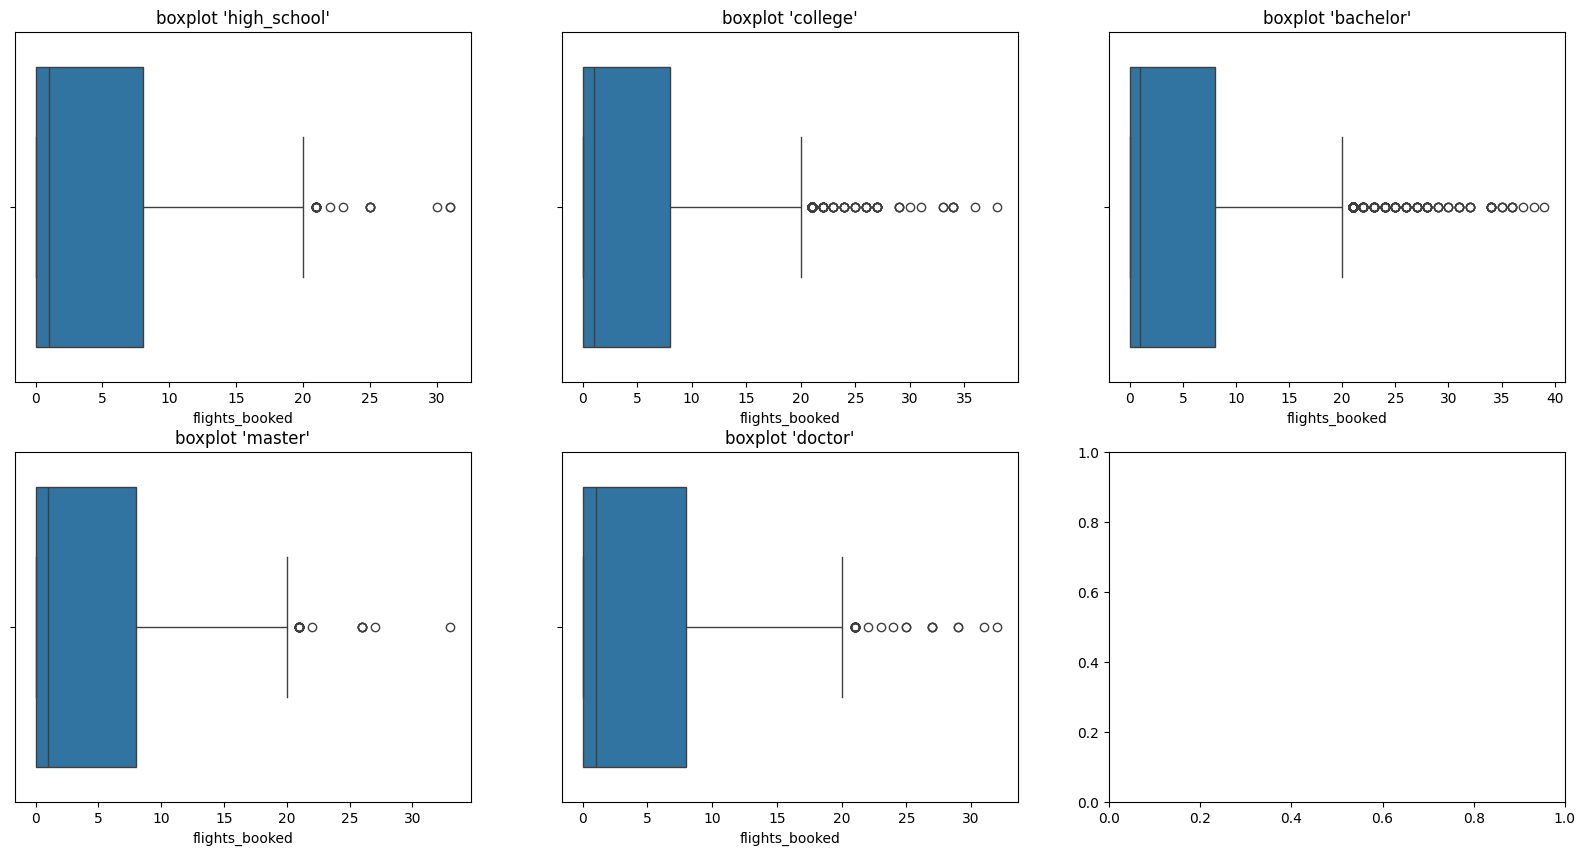

In [ ]:
#Boxplot
#empezamos creando el subplot con el n√∫mero de gr√°ficas deseadas en su interior
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

sns.boxplot(x = "flights_booked", 
            data = df_grupo_high_school, 
            ax = axes[0,0])
axes[0,0].set_title("boxplot 'high_school'")

sns.boxplot(x = "flights_booked", 
            data = df_grupo_college, 
            ax = axes[0,1])
axes[0,1].set_title("boxplot 'college'")


sns.boxplot(x = "flights_booked", 
            data = df_grupo_bachelor, 
            ax = axes[0,2])
axes[0,2].set_title("boxplot 'bachelor'")

sns.boxplot(x = "flights_booked", 
            data = df_grupo_master,  
            ax = axes[1,0])
axes[1,0].set_title("boxplot 'master'")

sns.boxplot(x = "flights_booked", 
            data = df_grupo_doctor,  
            ax = axes[1,1])
axes[1,1].set_title("boxplot 'doctor'");

En todas, aunque sobre todo en `College`, `bachelor` y `doctor`, hay bastantes observaciones que se salen de del rango intercuat√≠lico. Esto puede ser de gran ayuda de cara a analizar la prueba de hip√≥tesis que tenemos a continuaci√≥n, porque parece que s√≠ habr√° una diferencia en el n√∫mero de vuelos reservados y los diferentes niveles educativos.

## 3. Prueba de hip√≥tesis:

- `H0 (Hip√≥tesis nula)` = no existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos.

- `H1 (Hip√≥tesis alternativa)` = Existe diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos.


### `Estructura de prueba de hip√≥tesis`:

1. Primero verificamos si los datos son normales  
- usando el test de Shapiro-Wilk (menos de 5.000 datos) o 
- Kolmogorov-Smirnov (m√°s de 5.000 datos en muestra). 

-- > ahora haremos el test, pero con un `histograma`, podemos ver si la distribuci√≥n es normal:

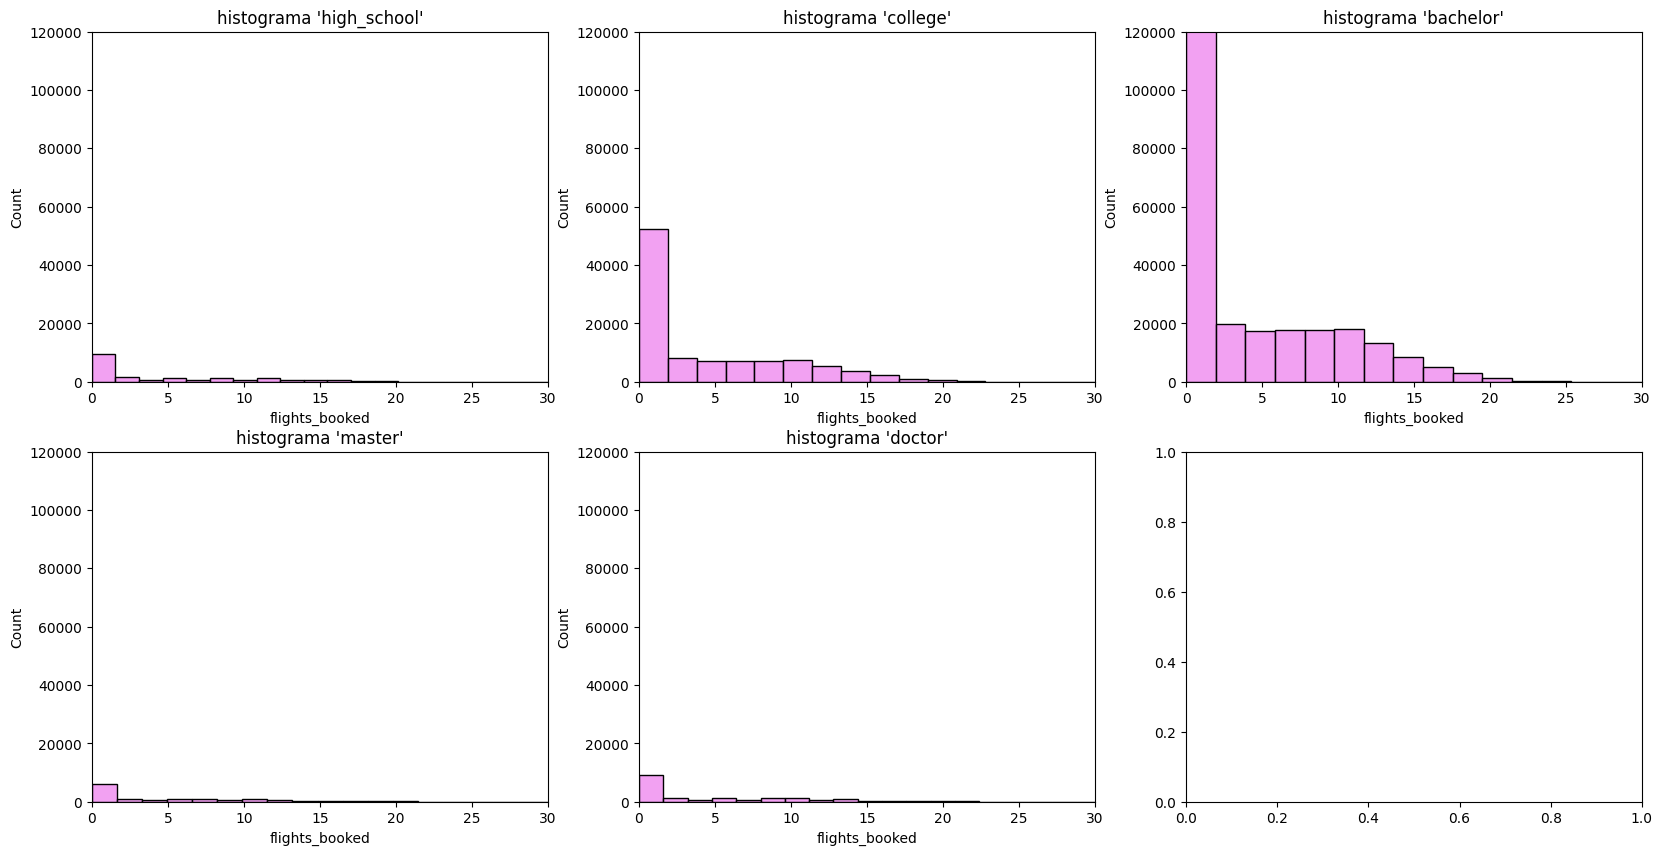

In [ ]:
#Histograma
#empezamos creando el subplot con el n√∫mero de gr√°ficas deseadas en su interior
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

sns.histplot(x = "flights_booked", 
            data = df_grupo_high_school, 
            color = "violet", 
            bins = 20, 
            ax = axes[0,0])
axes[0,0].set_title("histograma 'high_school'")

sns.histplot(x = "flights_booked", 
            data = df_grupo_college, 
            color = "violet", 
            bins = 20, 
            ax = axes[0,1])
axes[0,1].set_title("histograma 'college'")


sns.histplot(x = "flights_booked", 
            data = df_grupo_bachelor, 
            color = "violet", 
            bins = 20, 
            ax = axes[0,2])
axes[0,2].set_title("histograma 'bachelor'")

sns.histplot(x = "flights_booked", 
            data = df_grupo_master, 
            color = "violet", 
            bins = 20, 
            ax = axes[1,0])
axes[1,0].set_title("histograma 'master'")

sns.histplot(x = "flights_booked", 
            data = df_grupo_doctor, 
            color = "violet", 
            bins = 20, 
            ax = axes[1,1])
axes[1,1].set_title("histograma 'doctor'");

#ponemos la misma escala en los ejes:
#eje x, para asegurarnos que coge bien el mes n√∫m 12:
axes[0,0].set_xlim(0,30) 
axes[0,1].set_xlim(0,30) 
axes[0,2].set_xlim(0,30) 
axes[1,0].set_xlim(0,30) 
axes[1,1].set_xlim(0,30) 

#eje y, hasta 120.000:
axes[0,0].set_ylim(0,120000) 
axes[0,1].set_ylim(0,120000) 
axes[0,2].set_ylim(0,120000) 
axes[1,0].set_ylim(0,120000) 
axes[1,1].set_ylim(0,120000);

 2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    -  Por el histograma, no parece que vayan a ser normales, tendremos que usar Levene.

 3. Si las varianzas son iguales, usa el t-test de Student si no, usa la versi√≥n de Welch (ambos son tests Param√©tricos).

 4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no param√©trica).

In [ ]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hip√≥tesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk (menos de 5.000 datos) o Kolmogorov-Smirnov (m√°s de 5.000 datos en muestra).
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si estamos comparando dos grupos a la vez:
        3.1.Si las varianzas son iguales, usa el t-test de Student si no, usa la versi√≥n de Welch (ambos son tests Param√©tricos).
        3.2.Si los datos no son normales, y son s√≥lo dos grupos: se usa el test de Mann-Whitney (alternativa no param√©trica), en el caso de que haya m√°s de dos grupos, .
    4. Si estamos comparando m√°s de dos grupos a la vez:
        4.1. Usa ANOVA (si los datos son normales) o Kruskal-Wallis (si no son normales).
        4.2. Usa Kruskal-Wallis si datos NO normales.

    Par√°metros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hip√≥tesis.
    """
    # Inicializar variables para evitar error, porque t_stat y p_valor solo se asignan dentro de las condiciones if-else, 
    # pero si ninguna de esas condiciones se cumple, las variables nunca se definen, lo que genera el error cuando intentas acceder a ellas
    t_stat, p_valor, test_usado = None, None, None
    
    # PASO 1: Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 5000:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 5000 
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 5000(Hasta 5000 saphiro es robusto, aunque depende tb de otras cosas)
        normalidad.append(p_valor_norm > 0.05)
    #nota: p_valor_norm > 0.05:
    #Si True, significa que no hay suficiente evidencia para rechazar la hip√≥tesis nula (es decir, los datos podr√≠an seguir una distribuci√≥n normal).
    #Si False, significa que hay suficiente evidencia para rechazar la normalidad.
    

    # PASO 2: Prueba de igualdad de varianzas:
    datos_normales = all(normalidad)  
    # La funci√≥n all(iterable) en Python: all() devuelve True s√≥lo si todos los elementos en normalidad son True.
    # Si al menos un elemento es False, entonces all() devuelve False. 
    # Es decir, si datos_normales = True, significa que todos los grupos pasaron la prueba de normalidad. 
    # Si datos_normales = False, significa que al menos un grupo no es normal.

    # Prueba de igualdad de varianzas
    if datos_normales: #(if datos_normales == True)
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales


    # PASO 3 y PASO 4: Aplicar el test adecuado:

    varianzas_iguales = p_valor_varianza > 0.05 
    # Si p_valor_varianza > 0.05, no hay suficiente evidencia para decir que las varianzas son diferentes 
    # ‚Üí Se asume que las varianzas son iguales (varianzas_iguales = True).

    # OPCI√ìN 1: s√≥lo para comparar 2 grupos.

    if len(args) == 2: 
        if datos_normales:
            if varianzas_iguales:
                # el t-test de Student s√≥lo se puede usar cuando no hay normalidad y cuando se pretenden comparar 2 grupos.
                t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
                test_usado = "t-test de Student (varianzas iguales)"
            else:
                t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
                test_usado = "t-test de Welch (varianzas desiguales)"
        #Mann-Whitney U: este test s√≥lo se puede usar cuando no hay normalidad y cuando se pretenden comparar 2 grupos.
        else:
            t_stat, p_valor = stats.mannwhitneyu(*args)
            test_usado = "Mann-Whitney U (prueba no param√©trica)"


    # OPCI√ìN 2: para comparar 2 grupos o m√°s   
    
    elif len(args) > 2:  # Para m√°s de dos grupos
        # ANOVA si datos normales
        if datos_normales:
            t_stat, p_valor = stats.f_oneway(*args) 
            test_usado = "ANOVA (prueba param√©trica)"
        # Kruskal-Wallis si datos NO normales
        else:
            t_stat, p_valor = stats.kruskal(*args)
            test_usado = "Kruskal-Wallis (prueba no param√©trica)"

    else:
        raise ValueError("Se necesitan al menos dos conjuntos de datos.")

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estad√≠stico": t_stat,
        "p-valor": p_valor,
        "Conclusi√≥n": "Rechazamos H0 (Hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera m√°s clara
    print("**üìå Resultados de la Prueba de Hip√≥tesis**")
    print(f"Test de Normalidad: {'S√≠' if datos_normales else 'No'}")
    print(f"Normalidad por grupo: {normalidad}")
    print(f"Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"Test aplicado: {test_usado}")
    print(f" Estad√≠stico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"üîç Conclusi√≥n: {resultado['Conclusi√≥n']}")

    return resultado

In [ ]:
prueba_hipotesis(grupo_high_school, grupo_college, grupo_bachelor, grupo_master, grupo_doctor)

**üìå Resultados de la Prueba de Hip√≥tesis**
Test de Normalidad: No
Normalidad por grupo: [np.False_, np.False_, np.False_, np.False_, np.False_]
Test de Varianza: Desiguales (p = 0.0038)
Test aplicado: Kruskal-Wallis (prueba no param√©trica)
 Estad√≠stico: 18.7151, p-valor: 0.0009
üîç Conclusi√≥n: Rechazamos H0 (Hay diferencias significativas)


{'Test de Normalidad': [np.False_, np.False_, np.False_, np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.0038152909032901144),
 'Varianzas Iguales': np.False_,
 'Test Usado': 'Kruskal-Wallis (prueba no param√©trica)',
 'Estad√≠stico': np.float64(18.71507053972487),
 'p-valor': np.float64(0.0008939855290647737),
 'Conclusi√≥n': 'Rechazamos H0 (Hay diferencias significativas)'}

Rescatamos nuestras hip√≥tesis:

- `H0 (Hip√≥tesis nula)` = no existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos.

- `H1 (Hip√≥tesis alternativa)` = Existe diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos.



### `Conclusi√≥n`:

Tal y como vimos arriba con los boxplots, s√≠ hay una diferencia entre el n√∫mero de vuelos reservados y los diferentes niveles educativos.



-- > Rechazamos la `H0 (Hip√≥tesis nula)` porque hay diferencias significativas.

